# **tf.data**
- tf.placeholder 대안으로 더 학습속도가 빠른 tf.data가 주로 사용되고 있음

```python
tf.data.Dataset
tf.data.Iterator
```

1. Dataset 선언
2. Iterator 설정
3. get_next

---

In [1]:
%matplotlib inline
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

- X: 시카고 도시에 있는 화재의 수
- Y: 시카고 도시에 있는 범죄의 수

In [2]:
path = 'dataset/regression.csv'

df= pd.read_csv(path)

df.head(5)

,X,Y
0,6.2,29
1,9.5,44
2,10.5,36
3,7.7,37
4,8.6,53


In [3]:
x = df['X'].values.reshape(-1,1).astype(np.float32)
y = df['Y'].values.reshape(-1,1).astype(np.float32)
print('x:',x[:5],'\n')
print('y:',y[:5])

x: [[ 6.2]
 [ 9.5]
 [10.5]
 [ 7.7]
 [ 8.6]] 

y: [[29.]
 [44.]
 [36.]
 [37.]
 [53.]]


In [4]:
def data_partition(x,y):
    idx = np.arange(len(x))
    np.random.shuffle(idx)

    trn_idx = idx[:int(len(x)*0.6)] # 60%
    val_idx = idx[int(len(x)*0.6):int(len(x)*0.8)] # 20%
    tst_idx = idx[int(len(x)*0.8):] # 20%
    
    return {'train': {'x': x[trn_idx], 
                      'y': y[trn_idx]},
            'valid': {'x': x[val_idx],
                     'y': y[val_idx]},
            'test': {'x': x[tst_idx],
                     'y': y[tst_idx]}
           }

In [5]:
data_dict = data_partition(x,y)
data_dict['train']['x']

array([[ 7.7],
       [18.5],
       [ 7.3],
       [ 5.6],
       [ 7.2],
       [34.1],
       [ 4. ],
       [ 3.6],
       [ 9. ],
       [11.9],
       [18.4],
       [ 5.4],
       [29.1],
       [ 6.2],
       [16.5],
       [ 9.5],
       [ 4.8],
       [ 8.6],
       [ 3.4],
       [15.1],
       [39.7],
       [ 2.2],
       [23.3],
       [10.7],
       [ 5.7]], dtype=float32)

$$ \text{mean squared error} = (y - \hat{y})^2$$

$$\hat{y} = Wx+b$$

---

In [6]:
# tensors=(features, labels)
dataset = tf.data.Dataset.from_tensor_slices(tensors=(data_dict['train']['x'], data_dict['train']['y']))

- shuffle: shuffle할 데이터의 수를 설정하게 됨(데이터의 수 만큼)
- repeat: 데이터를 n번 반복하여 읽음 (n epoch)
- batch: 

In [7]:
dataset_shuffle = dataset.shuffle(2) # buffer_size
dataset_repeat = dataset.repeat(2) # 
batch_size = 4
dataset_batch = dataset.batch(batch_size)

In [8]:
print(dataset.output_types)
print(dataset.output_shapes)

(tf.float32, tf.float32)
(TensorShape([Dimension(1)]), TensorShape([Dimension(1)]))


1) **dataset.make_one_shot_iterator()**
    - dataset를 한번만 iterate하게 읽을 수 있음 (1 epoch)
    - initialization을 할 필요가 없음

In [9]:
iterator1 = dataset.make_one_shot_iterator()
iterator2 = dataset_shuffle.make_one_shot_iterator()
iterator3 = dataset_repeat.make_one_shot_iterator()
iterator4 = dataset_batch.make_one_shot_iterator()

X1, Y1 = iterator1.get_next()
X2, Y2 = iterator2.get_next()
X3, Y3 = iterator3.get_next()
X4, Y4 = iterator4.get_next()

In [10]:
# basic
with tf.Session() as sess:
    for i in range(len(data_dict['train']['x'])):
        print(sess.run([X1, Y1]))

[array([7.7], dtype=float32), array([37.], dtype=float32)]
[array([18.5], dtype=float32), array([22.], dtype=float32)]
[array([7.3], dtype=float32), array([31.], dtype=float32)]
[array([5.6], dtype=float32), array([23.], dtype=float32)]
[array([7.2], dtype=float32), array([29.], dtype=float32)]
[array([34.1], dtype=float32), array([68.], dtype=float32)]
[array([4.], dtype=float32), array([16.], dtype=float32)]
[array([3.6], dtype=float32), array([15.], dtype=float32)]
[array([9.], dtype=float32), array([39.], dtype=float32)]
[array([11.9], dtype=float32), array([46.], dtype=float32)]
[array([18.4], dtype=float32), array([32.], dtype=float32)]
[array([5.4], dtype=float32), array([27.], dtype=float32)]
[array([29.1], dtype=float32), array([34.], dtype=float32)]
[array([6.2], dtype=float32), array([29.], dtype=float32)]
[array([16.5], dtype=float32), array([40.], dtype=float32)]
[array([9.5], dtype=float32), array([44.], dtype=float32)]
[array([4.8], dtype=float32), array([19.], dtype=flo

In [11]:
# shuffle(2)
with tf.Session() as sess:
    for i in range(len(data_dict['train']['x'])):
        print(sess.run([X2, Y2]))

[array([7.7], dtype=float32), array([37.], dtype=float32)]
[array([7.3], dtype=float32), array([31.], dtype=float32)]
[array([5.6], dtype=float32), array([23.], dtype=float32)]
[array([7.2], dtype=float32), array([29.], dtype=float32)]
[array([34.1], dtype=float32), array([68.], dtype=float32)]
[array([18.5], dtype=float32), array([22.], dtype=float32)]
[array([4.], dtype=float32), array([16.], dtype=float32)]
[array([3.6], dtype=float32), array([15.], dtype=float32)]
[array([9.], dtype=float32), array([39.], dtype=float32)]
[array([18.4], dtype=float32), array([32.], dtype=float32)]
[array([5.4], dtype=float32), array([27.], dtype=float32)]
[array([29.1], dtype=float32), array([34.], dtype=float32)]
[array([6.2], dtype=float32), array([29.], dtype=float32)]
[array([16.5], dtype=float32), array([40.], dtype=float32)]
[array([9.5], dtype=float32), array([44.], dtype=float32)]
[array([11.9], dtype=float32), array([46.], dtype=float32)]
[array([8.6], dtype=float32), array([53.], dtype=flo

In [12]:
# repeat(2)
with tf.Session() as sess:
    for i in range(len(data_dict['train']['x'])*2):
        print(sess.run([X3, Y3]))

[array([7.7], dtype=float32), array([37.], dtype=float32)]
[array([18.5], dtype=float32), array([22.], dtype=float32)]
[array([7.3], dtype=float32), array([31.], dtype=float32)]
[array([5.6], dtype=float32), array([23.], dtype=float32)]
[array([7.2], dtype=float32), array([29.], dtype=float32)]
[array([34.1], dtype=float32), array([68.], dtype=float32)]
[array([4.], dtype=float32), array([16.], dtype=float32)]
[array([3.6], dtype=float32), array([15.], dtype=float32)]
[array([9.], dtype=float32), array([39.], dtype=float32)]
[array([11.9], dtype=float32), array([46.], dtype=float32)]
[array([18.4], dtype=float32), array([32.], dtype=float32)]
[array([5.4], dtype=float32), array([27.], dtype=float32)]
[array([29.1], dtype=float32), array([34.], dtype=float32)]
[array([6.2], dtype=float32), array([29.], dtype=float32)]
[array([16.5], dtype=float32), array([40.], dtype=float32)]
[array([9.5], dtype=float32), array([44.], dtype=float32)]
[array([4.8], dtype=float32), array([19.], dtype=flo

In [13]:
# batch(2)
with tf.Session() as sess:
    for i in range(math.ceil((len(data_dict['train']['x'])/batch_size))):
        print(sess.run([X4, Y4]))

[array([[ 7.7],
       [18.5],
       [ 7.3],
       [ 5.6]], dtype=float32), array([[37.],
       [22.],
       [31.],
       [23.]], dtype=float32)]
[array([[ 7.2],
       [34.1],
       [ 4. ],
       [ 3.6]], dtype=float32), array([[29.],
       [68.],
       [16.],
       [15.]], dtype=float32)]
[array([[ 9. ],
       [11.9],
       [18.4],
       [ 5.4]], dtype=float32), array([[39.],
       [46.],
       [32.],
       [27.]], dtype=float32)]
[array([[29.1],
       [ 6.2],
       [16.5],
       [ 9.5]], dtype=float32), array([[34.],
       [29.],
       [40.],
       [44.]], dtype=float32)]
[array([[ 4.8],
       [ 8.6],
       [ 3.4],
       [15.1]], dtype=float32), array([[19.],
       [53.],
       [17.],
       [30.]], dtype=float32)]
[array([[39.7],
       [ 2.2],
       [23.3],
       [10.7]], dtype=float32), array([[147.],
       [ 14.],
       [ 29.],
       [ 43.]], dtype=float32)]
[array([[5.7]], dtype=float32), array([[11.]], dtype=float32)]


2) **dataset.make_initializable_iterator()***
    - dataset를 원하는 만큼 iterate하게 읽을 수 있음 (n epoch)
    - initialization을 해주어

In [14]:
iterator = dataset_batch.make_initializable_iterator()
X, Y = iterator.get_next()

In [15]:
with tf.Session() as sess:
    for epoch in range(2):
        sess.run(iterator.initializer) # only one
        for i in range(math.ceil((len(data_dict['train']['x'])/batch_size))):
            print(sess.run([X, Y]))

[array([[ 7.7],
       [18.5],
       [ 7.3],
       [ 5.6]], dtype=float32), array([[37.],
       [22.],
       [31.],
       [23.]], dtype=float32)]
[array([[ 7.2],
       [34.1],
       [ 4. ],
       [ 3.6]], dtype=float32), array([[29.],
       [68.],
       [16.],
       [15.]], dtype=float32)]
[array([[ 9. ],
       [11.9],
       [18.4],
       [ 5.4]], dtype=float32), array([[39.],
       [46.],
       [32.],
       [27.]], dtype=float32)]
[array([[29.1],
       [ 6.2],
       [16.5],
       [ 9.5]], dtype=float32), array([[34.],
       [29.],
       [40.],
       [44.]], dtype=float32)]
[array([[ 4.8],
       [ 8.6],
       [ 3.4],
       [15.1]], dtype=float32), array([[19.],
       [53.],
       [17.],
       [30.]], dtype=float32)]
[array([[39.7],
       [ 2.2],
       [23.3],
       [10.7]], dtype=float32), array([[147.],
       [ 14.],
       [ 29.],
       [ 43.]], dtype=float32)]
[array([[5.7]], dtype=float32), array([[11.]], dtype=float32)]
[array([[ 7.7],
       [18.

---

1) **Graph 생성**


In [16]:
tf.reset_default_graph()

- graph에 흘려보내는 데이터

In [17]:
batch_size = tf.placeholder(tf.int64)
x = tf.placeholder(shape=[None, 1], dtype=tf.float32, name = 'X')
y = tf.placeholder(shape=[None, 1], dtype=tf.float32, name = 'Y')

1) Dataset

In [18]:
dataset = tf.data.Dataset.from_tensor_slices(tensors=(x, y)).batch(batch_size)

2) Iterator

In [19]:
iterator = dataset.make_initializable_iterator()

3) get.next (dynamic)

In [20]:
X, Y = iterator.get_next()

- graph의 학습 파라미터

In [21]:
W = tf.get_variable(name='weight', shape=[1,1], initializer=tf.zeros_initializer())
b = tf.get_variable(name='bias', shape=[1,1], initializer=tf.zeros_initializer()) # trainable
print(W)
print(b)

<tf.Variable 'weight:0' shape=(1, 1) dtype=float32_ref>
<tf.Variable 'bias:0' shape=(1, 1) dtype=float32_ref>


- 모델 생성

In [22]:
Y_predicted = tf.matmul(X,W)+b 
Y_predicted

<tf.Tensor 'add:0' shape=(?, 1) dtype=float32>

- 손실함수(목적함수) 정의

In [23]:
loss = tf.reduce_mean(tf.square(Y-Y_predicted))
loss

<tf.Tensor 'Mean:0' shape=() dtype=float32>

- 최적화

In [24]:
optimizer = tf.train.AdamOptimizer(learning_rate=0.01)

train_op = optimizer.minimize(loss)

---

2) **Session 사용하여 Operation(Op) 수행**
    - Train/Development(Validation)
    - Test

2-1) **Train/Development(Validation)**

In [25]:
config = tf.ConfigProto()
config.gpu_options.allow_growth=True

sess = tf.Session()

sess.run(tf.global_variables_initializer())

train_cumulative_loss = []    
valid_cumulative_loss = []

for i in range(1000):

    # training
    sess.run(iterator.initializer,feed_dict={x:data_dict['train']['x'],
                                             y: data_dict['train']['y'],
                                             batch_size: 4})
    train_batch_loss = []
    try:
        while True:
            _, _X, _loss = sess.run([train_op, X, loss]) # loss op를 한 번 가져올 때 batch 1개가 읽힘
            #print('train:',_X, _loss)
            train_batch_loss.append(_loss)
            
    except tf.errors.OutOfRangeError: 
        pass

    
    # development
    sess.run(iterator.initializer,feed_dict={x:data_dict['valid']['x'],
                                             y: data_dict['valid']['y'],
                                             batch_size: 4})
    
    valid_batch_loss = []
    try:
        while True:
            _X, _loss = sess.run([X,loss]) # dependency
            #print('valid:',_X, _loss)
            valid_batch_loss.append(_loss)
            
    except tf.errors.OutOfRangeError: 
        pass


    train_cumulative_loss.append(np.mean(train_batch_loss))
    valid_cumulative_loss.append(np.mean(valid_batch_loss))
    
    if i % 200 == 0:
        print('epoch {}:'.format(str(i).zfill(3)), 
              'trn_loss({})'.format(np.mean(train_batch_loss)), 
              'val_loss({})'.format(np.mean(valid_batch_loss)))

epoch 000: trn_loss(1731.316162109375) val_loss(1422.6817626953125)
epoch 200: trn_loss(306.6029357910156) val_loss(906.5255126953125)
epoch 400: trn_loss(300.028564453125) val_loss(871.75)
epoch 600: trn_loss(298.08221435546875) val_loss(851.6092529296875)
epoch 800: trn_loss(297.6878356933594) val_loss(842.5679931640625)


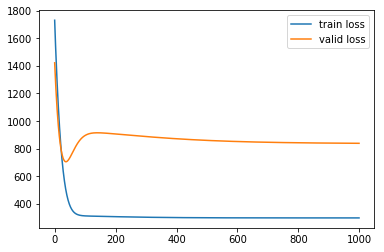

In [26]:
plt.plot(train_cumulative_loss, label = 'train loss')
plt.plot(valid_cumulative_loss, label = 'valid loss')
plt.legend()

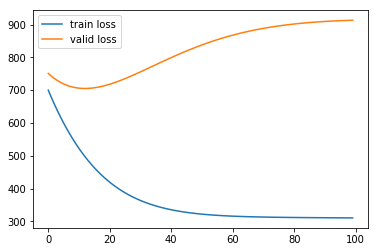

In [27]:
plt.plot(train_cumulative_loss[25:125], label = 'train loss')
plt.plot(valid_cumulative_loss[25:125], label = 'valid loss')
plt.legend()

$$\hat{y} = Wx+b$$

In [28]:
sess.run(W)

array([[2.0539436]], dtype=float32)

In [29]:
sess.run(b)

array([[9.267352]], dtype=float32)

In [30]:
sess.close()

- 성능비교
    - With placeholder: 9.05271519 seconds
    - With tf.data: 6.12285947 seconds